# Gradient Descent

gradient descent 방법을 적용하여 다음 함수의 최저점을 구하여라.$$ f(x) = \frac{1}{2}x^4 -3 x^3 $$

In [27]:
import numpy as np
import matplotlib.pyplot as plt

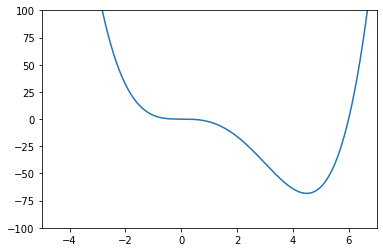

In [28]:

x = np.arange(-10,10,0.01)
def f(x):
    return 0.5*x**4 - 3*x**3
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(x,f(x))

In [29]:
import random

x_old = 0#이전 비교값 초기값
x_new = -2#지금 선택값 초기값

eps = 0.01 #기울기 x축 이동 반영 정도
precision = 0.00001#x값 비교 정지 기준

find=0#찾은 답중 가장 작은값 저장

def f_prime(x):#미분식 저장 함수
    return 2*x**3-9*x**2


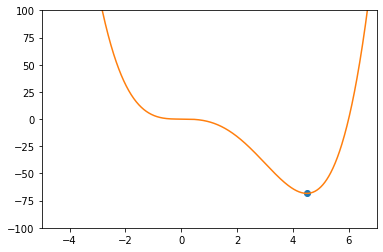

In [30]:
for i in range(1000):#확률적으로 답을 찾기 때문에 여러번 반복해 확률을 높힘
    x_old = 0#이전 비교값 초기화
    x_new = -2#지금 선택값 초기화
    while abs(x_new - x_old) > precision:#값 비교 정지 판단
        x_old = x_new
        x_new = x_old - eps * f_prime(x_old)*random.randrange(1,10)#eps의 크기 랜덤을 곱해 확률적으로 구덩이에서 빠저나올 수 있음
    if(f(find)>f(x_new)):#상대적으로 작은 값을 기록함
        find=x_new


plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(find,f(find),'o')
plt.plot(x,f(x))

# Diabetes (regression)

다음의 당뇨 데이터를 회귀 분석하여라. 나이, BMI, 혈압, Y (당뇨병 진행 정도) 데이터를 이용하여라.

1.sklearn을 이용하지 않고 (자신의 코드로)

2.sklearn을 이용해서

In [31]:
from sklearn import datasets

diabetes=datasets.load_diabetes()

diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [32]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

In [33]:
X_age=diabetes.data[:,0] # 나이
X_bmi=diabetes.data[:,2] # BMI
X_p=diabetes.data[:,3] # 혈압
Y = diabetes.target

1.sklearn을 이용하지 않고 (자신의 코드로)

In [67]:
def linear(a,b,x):
    return a*x+b


In [72]:
def regression(arrX,arrY,d,n):
    #arrX=X값
    #arrY=Y값
    #d=변화크기
    #n=반복 횟수
    a=0#기울기 초기값
    b=0#절편 초기값

    for i in range(n):#오차가 적은 값을 선택 값을 더하고 빼주는 과정을 반복 과하게 이동했을 경우 수정
        if(sum((arrY-linear(a+d,b,arrX))**2)/arrY.size<sum((arrY-linear(a,b,arrX))**2)/arrY.size):
            a=a+d
        if(sum((arrY-linear(a,b+d,arrX))**2)/arrY.size<sum((arrY-linear(a,b,arrX))**2)/arrY.size):
            b=b+d
        if(sum((arrY-linear(a-d,b,arrX))**2)/arrY.size<sum((arrY-linear(a,b,arrX))**2)/arrY.size):
            a=a-d
        if(sum((arrY-linear(a,b-d,arrX))**2)/arrY.size<sum((arrY-linear(a,b,arrX))**2)/arrY.size):
            b=b-d

    plt.plot(arrX, arrY, 'o')
    plt.plot(arrX,linear(a,b,arrX))
    plt.show()
    print("기울기:",a)
    print("절편:",b)
    return 

나이


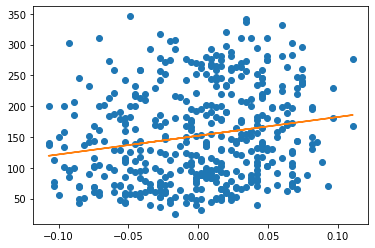

기울기: 304
절편: 152


BMI


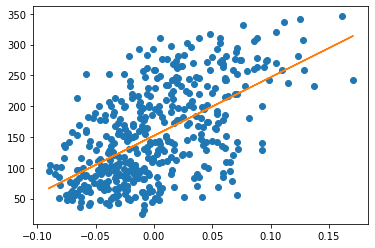

기울기: 949
절편: 152


혈압


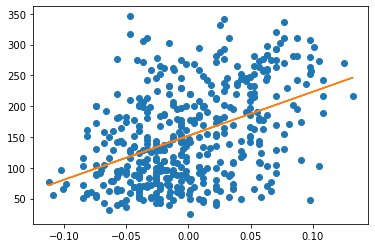

기울기: 715
절편: 152


In [80]:
print("나이")
regression(X_age,Y,1,1000)
print("")
print("")
print("BMI")
regression(X_bmi,Y,1,1000)
print("")
print("")
print("혈압")
regression(X_p,Y,1,1000)


2.sklearn을 이용해서

In [84]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [85]:
def sklearnf(arrX,arrY):
    line_fitter = LinearRegression()
    line_fitter.fit(arrX.reshape(-1,1), arrY)
    plt.plot(arrX, arrY, 'o')
    plt.plot(arrX,line_fitter.predict(arrX.reshape(-1,1)))
    plt.show()
    print("기울기:",line_fitter.coef_)
    print("절편:",line_fitter.intercept_)

나이


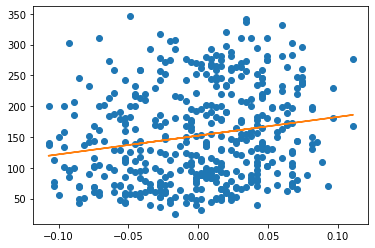

기울기: [304.18307453]
절편: 152.13348416289605


BMI


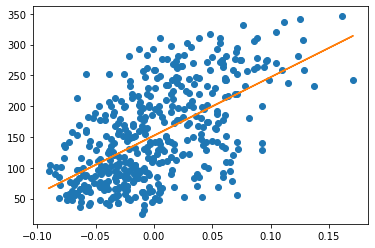

기울기: [949.43526038]
절편: 152.1334841628967


혈압


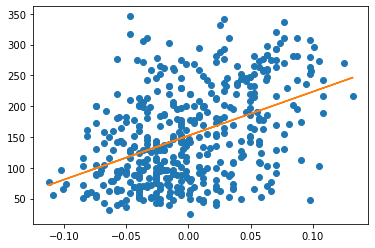

기울기: [714.7416437]
절편: 152.13348416289585


In [87]:

print("나이")
sklearnf(X_age,Y)
print("")
print("")
print("BMI")
sklearnf(X_bmi,Y)
print("")
print("")
print("혈압")
sklearnf(X_p,Y)